In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import cufflinks as cf
import chart_studio.plotly as py
import seaborn as sns
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

# icecream data

In [41]:
df = pd.read_csv('./ice_cream.csv')
df.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [42]:
df.rename(columns={'DATE':'date','IPN31152N':'production'},inplace=True)
df.head()

,date,production
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


# 選取開始日期

In [43]:
# 先轉換日期型態
df['date'] = pd.to_datetime(df['date'])
df['date'].head()

0   1972-01-01
1   1972-02-01
2   1972-03-01
3   1972-04-01
4   1972-05-01
Name: date, dtype: datetime64[ns]

In [44]:
#set date as index
df.set_index('date', inplace=True)

# set start_date
start_date = pd.to_datetime('2010-01-01')
df = df[start_date:]

In [45]:
px.line(df,y='production',labels={'x':'Date','y':'Production'})

# ACF
ACF衡量indirect effect + direct effect<br>
例如:以一個月為單位，則三個月前產品售價影響現在產品售價的correation的關係為何?<br>
(Mt-3 => Mt-2 => Mt-1 =>Mt) + (Mt-3 => Mt)<br>
ACF的絕對值越接近1，越能作有效預測以建立AR Model。(篩選閥值自定ex.0.5 < x)<br>
https://iter01.com/559511.html

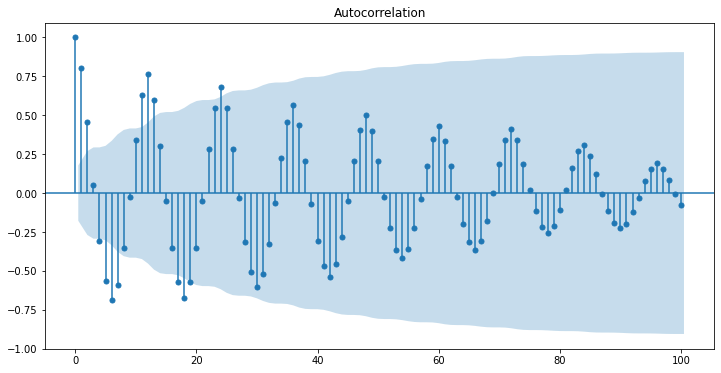

In [46]:
plt.rc("figure", figsize=(12,6))
acf = plot_acf(df['production'], lags=100)


# PACF
PACF衡量direct effect，例如:以一個月為單位，則三個月前影響現在產品售價的correation為多少(Mt-3 => Mt)<br>
(Mt-3 => Mt-2 => Mt-1 =>Mt)<br>
找出顯著的lag(無論正負)以建立AR Model。<br>
選lags 1, 2, 3, 10, 13<br>
https://iter01.com/559511.html

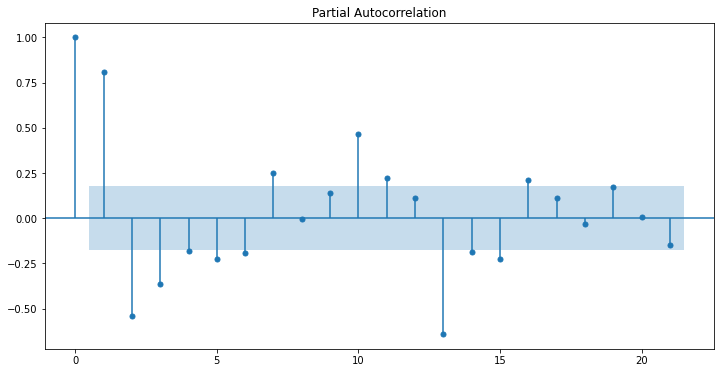

In [49]:
plt.rc("figure", figsize=(12,6))
acf = plot_pacf(df['production'])